In [1]:
from PIL import Image
from font_diffuser.args import SampleArgs
from font_diffuser.sample import load_fontdiffuer_pipeline, sampling

pygame 2.5.2 (SDL 2.28.2, Python 3.10.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
args = SampleArgs()

In [3]:
pipe = load_fontdiffuer_pipeline(args=args)

Load the down block  DownBlock2D
Load the down block  MCADownBlock2D
The style_attention cross attention dim in Down Block 1 layer is 1024
The style_attention cross attention dim in Down Block 2 layer is 1024
Load the down block  MCADownBlock2D
The style_attention cross attention dim in Down Block 1 layer is 1024
The style_attention cross attention dim in Down Block 2 layer is 1024
Load the down block  DownBlock2D
Load the up block  UpBlock2D
Load the up block  StyleRSIUpBlock2D
Load the up block  StyleRSIUpBlock2D
Load the up block  UpBlock2D
Param count for Ds initialized parameters: 20591296
Get CG-GAN Style Encoder!
Param count for Ds initialized parameters: 1187008
Get CG-GAN Content Encoder!
Loaded the model state_dict successfully!
Loaded training DDPM scheduler sucessfully!
Loaded dpm_solver pipeline sucessfully!


In [16]:
out_image = sampling(
    args=args, 
    pipe=pipe, 
    content_image=Image.open("data/r40202/pngs/gulim__7.png").convert('RGB'),
    style_image=Image.open(args.style_image_path).convert('RGB')
)

Sampling by DPM-Solver++ ......
Saving the image ......
Finish the sampling process, costing time 1.893364667892456s


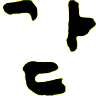

In [17]:
out_image

In [ ]:
from PIL import Image
Image.open(args.content_image_path).convert('RGB')
Image.open(args.style_image_path).convert('RGB')